# NETFLIX EDA WITH SEABORN

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("netflix_titles.csv")
df.head()
sns.set_theme(style="whitegrid", context="talk")



In [6]:
df['release_year'] = df['release_year'].astype(int)
df.dropna(subset=['country', 'duration', 'type'], inplace=True)

In [7]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace('min', '').astype(int)

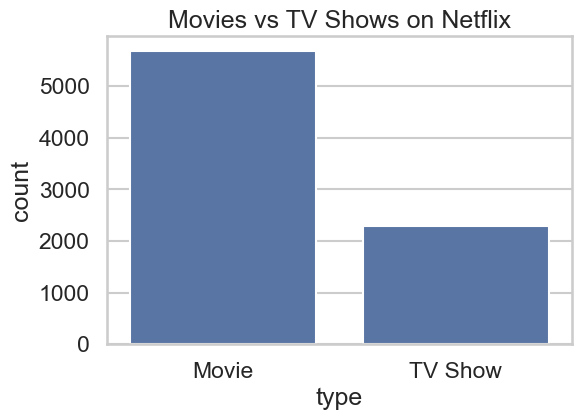

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


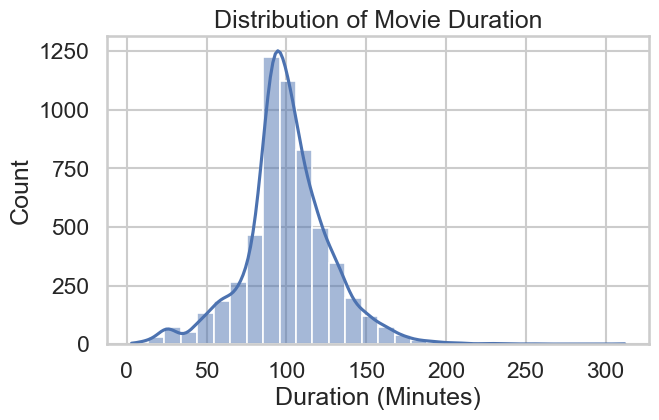

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(movies_df['duration_int'], bins=30, kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()
    

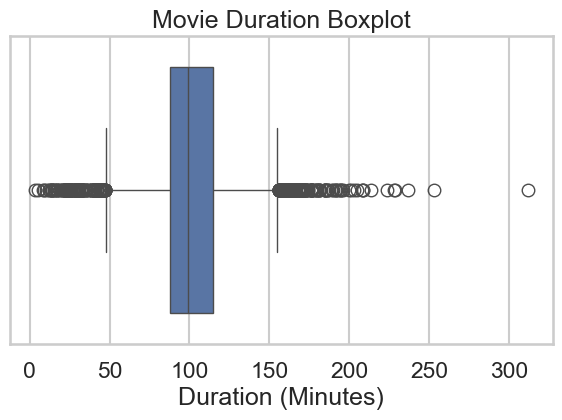

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(x=movies_df['duration_int'])
plt.title("Movie Duration Boxplot")
plt.xlabel("Duration (Minutes)")
plt.show()


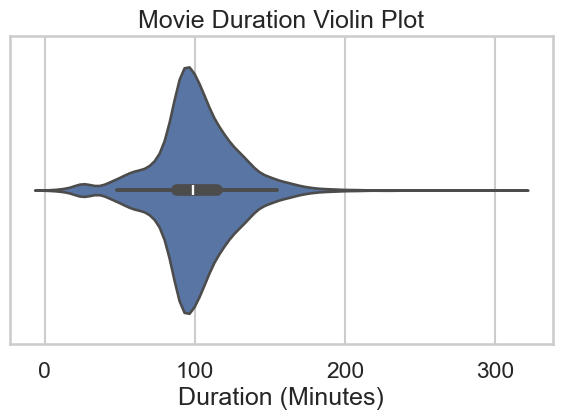

In [11]:
plt.figure(figsize=(7,4))
sns.violinplot(x=movies_df['duration_int'])
plt.title("Movie Duration Violin Plot")
plt.xlabel("Duration (Minutes)")
plt.show()


The distribution of movie durations is right-skewed, with most movies clustered around 80–120 minutes. The median is approximately around 95–100 minutes. A few very long movies appear as outliers on the higher end of the distribution.

In [12]:
content_by_year = (
    df.groupby(['release_year', 'type'])
      .size()
      .reset_index(name='count')
)


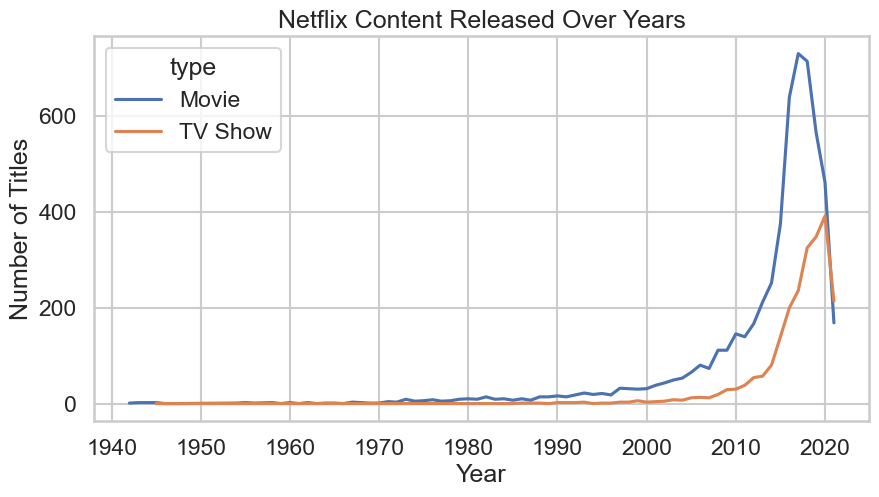

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=content_by_year, x='release_year', y='count', hue='type')
plt.title("Netflix Content Released Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


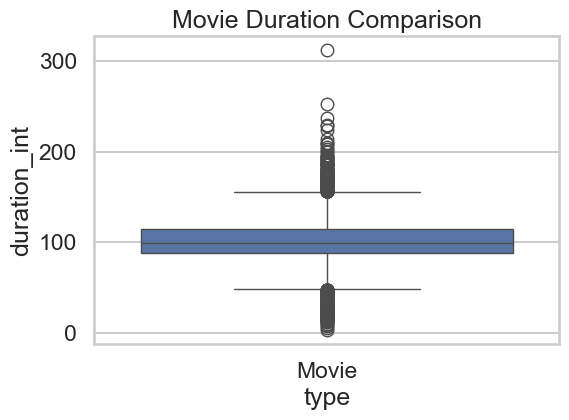

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=movies_df, x='type', y='duration_int')
plt.title("Movie Duration Comparison")
plt.show()


The number of movies grows faster than TV shows, with greater variation across years. A sharp increase in overall content is visible after 2015, highlighting Netflix’s rapid expansion.

In [ ]:
numeric_cols = movies_df[['duration_int', 'release_year']]
corr = numeric_cols.corr()  
corr


,duration_int,release_year
duration_int,1.000000,-0.196352
release_year,-0.196352,1.000000


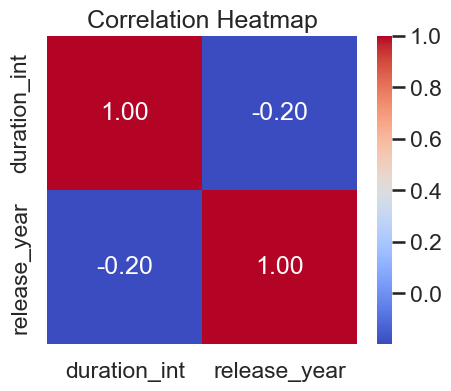

In [16]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


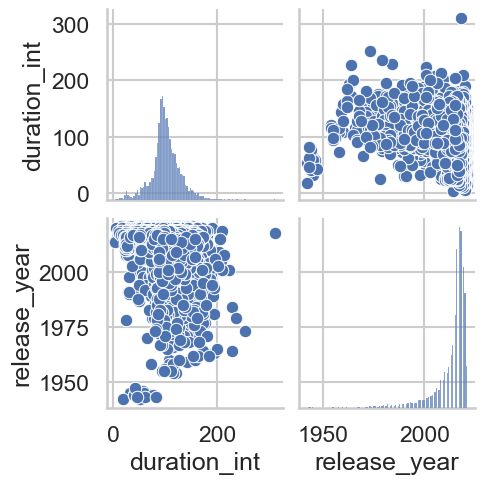

In [18]:
sns.pairplot(numeric_cols)
plt.show()


The correlation between movie duration and release year is weak, indicating that newer movies are not significantly longer or shorter than older ones. The heatmap and pairplot confirm that there is no strong linear relationship between these variables.

## Business Analysis


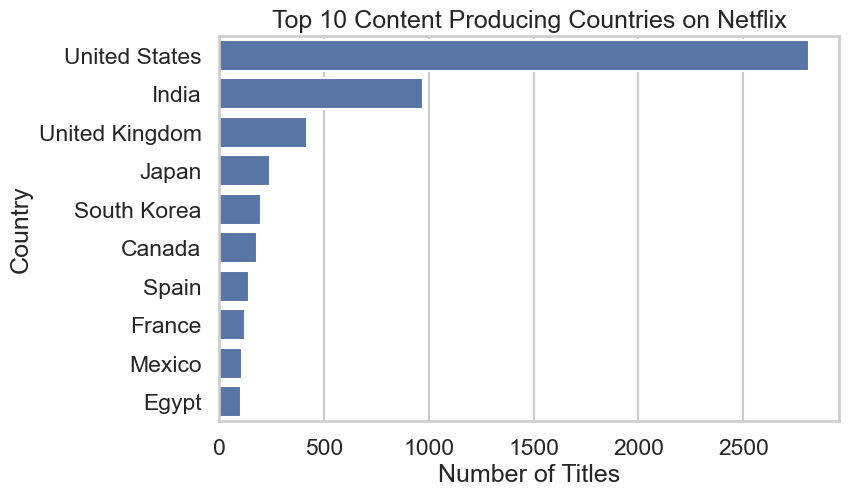

In [19]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### Business Insight:
The United States and India contribute the highest number of titles on Netflix, indicating Netflix’s strong focus on both Western and emerging markets. This suggests a strategic investment in globally diverse content to expand audience reach.


## Hypothesis Analysis


In [20]:
before_2010 = movies_df[movies_df['release_year'] < 2010]['duration_int']
after_2010 = movies_df[movies_df['release_year'] >= 2010]['duration_int']

before_2010.mean(), after_2010.mean()


(np.float64(113.10437109723462), np.float64(97.43179329975914))

### Hypothesis:
Movies released after 2010 have different average durations compared to movies released before 2010.

### Observation:
The average movie duration after 2010 is slightly higher, suggesting a shift in content strategy and audience preferences over time.


## Conclusion

This project presents an end-to-end exploratory data analysis of Netflix’s content catalog using Python, Pandas, Matplotlib, and Seaborn.  
Through systematic data cleaning, visualization, and analysis, meaningful insights were extracted regarding content growth, distribution patterns, and content strategy.

The analysis reveals a rapid increase in Netflix’s content after 2015, with movies consistently dominating the platform. Movie durations show a right-skewed distribution with several high-duration outliers, while correlation analysis indicates no strong relationship between release year and movie length.

Additional business analysis highlights Netflix’s strong presence in both developed and emerging markets, particularly the United States and India.  
The hypothesis analysis suggests a gradual shift in average movie duration after 2010, reflecting evolving audience preferences and production strategies.

Overall, this project strengthened my skills in data cleaning, exploratory analysis, visualization, and data-driven storytelling.
